<a href="https://colab.research.google.com/github/AshishBhatnagar022/KaggleWalmartChallenge/blob/master/Kaggle_Walmart_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive


drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from zipfile import ZipFile
file='drive/My Drive/Data/features.zip'
with ZipFile(file,'r')as zip:
  
  zip.extractall()
  print('Done')

Done


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
stores=pd.read_csv('stores.csv')
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
features=pd.read_csv('features.csv')

In [0]:
train=train.merge(stores,how='left').merge(features,how='left')
test=test.merge(stores,how='left').merge(features,how='left')

In [11]:

data=train
test_data=test
train.head()
train.shape

(421570, 16)

**Removing Null values, Outliers and Data Visualization**

In [12]:
train.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [0]:
cat=pd.DataFrame()
num=pd.DataFrame()

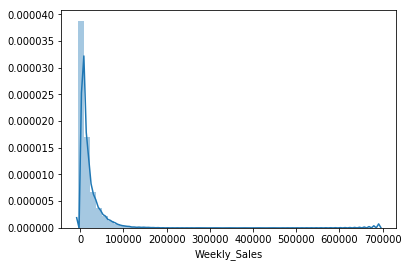

In [14]:
sns.distplot(train['Weekly_Sales'])

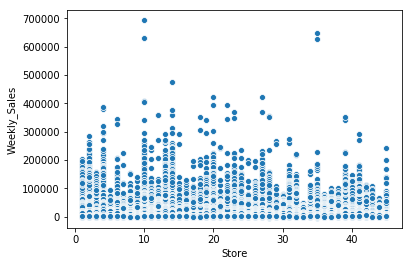

In [15]:
sns.scatterplot(data['Store'],data['Weekly_Sales'])

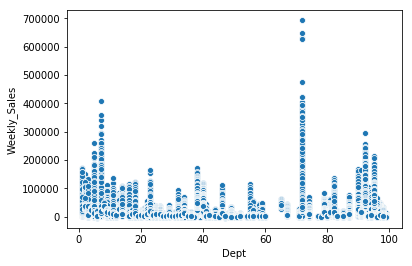

In [16]:
#Dept is Categorical
data['Dept'].value_counts()
sns.scatterplot(data['Dept'],data['Weekly_Sales'])

In [17]:
# Categorical
data['IsHoliday'].value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

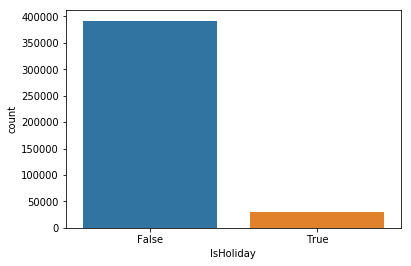

In [18]:
sns.countplot(data['IsHoliday'])

In [19]:
#Categorical
data['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

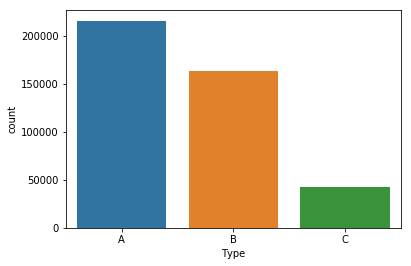

In [20]:
sns.countplot(data['Type'])

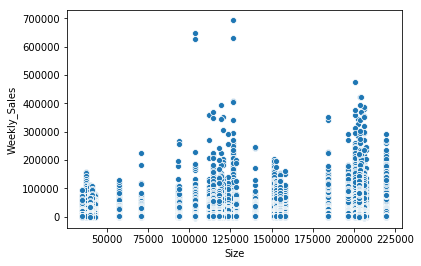

In [21]:
#Numerical
sns.scatterplot(data['Size'],data['Weekly_Sales'])

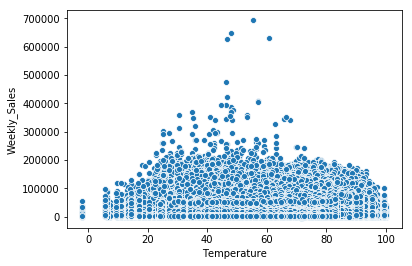

In [22]:
#Numerical
data['Temperature'].value_counts()
sns.scatterplot(data['Temperature'],data['Weekly_Sales'])

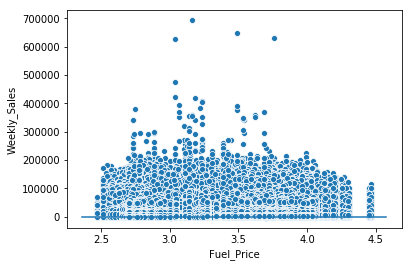

In [23]:
#Numerical
data['Fuel_Price'].value_counts()
sns.distplot(data['Fuel_Price'])
sns.scatterplot(data['Fuel_Price'],data['Weekly_Sales'])

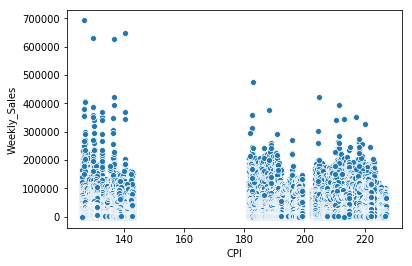

In [24]:
#Numerical
data['CPI'].value_counts()
# sns.distplot(data['CPI'])
sns.scatterplot(data['CPI'],data['Weekly_Sales'])

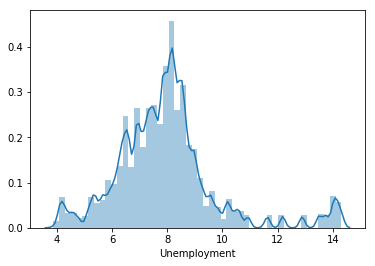

In [25]:

#Numerical
data['Unemployment'].value_counts()
sns.distplot(data['Unemployment'])


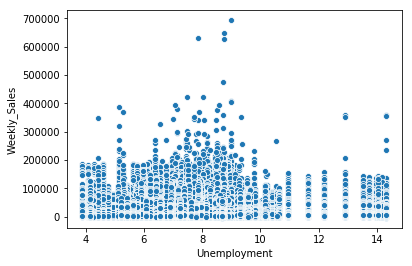

In [26]:
sns.scatterplot(data['Unemployment'],data['Weekly_Sales'])

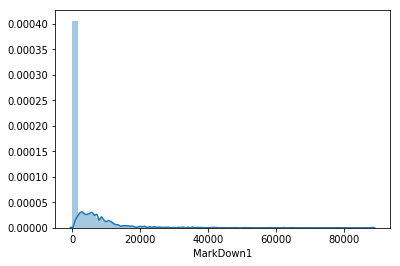

In [27]:
data['MarkDown1'].value_counts()
data['MarkDown1']=data['MarkDown1'].fillna(0)
sns.distplot(data['MarkDown1'])

In [0]:
data['MarkDown2']=data['MarkDown2'].fillna(0)
data['MarkDown3']=data['MarkDown3'].fillna(0)
data['MarkDown4']=data['MarkDown4'].fillna(0)
data['MarkDown5']=data['MarkDown5'].fillna(0)


**Feature Engineering**

After removing the outliers and cleaning the data now its time to check the coorelation and label encode

In [0]:
num['MarkDown1']=data['MarkDown1']
num['MarkDown2']=data['MarkDown2']
num['MarkDown3']=data['MarkDown3']
num['MarkDown4']=data['MarkDown4']
num['MarkDown5']=data['MarkDown5']
num['CPI']=data['CPI']
num['Unemployment']=data['Unemployment']
num['Fuel_Price']=data['Fuel_Price']
num['Temperature']=data['Temperature']
num['Size']=data['Size']
num['Fuel_Price']=data['Fuel_Price']


cat['Store']=data['Store']
cat['Dept']=data['Dept']
cat['IsHoliday']=data['IsHoliday']
cat['Type']=data['Type']

In [30]:
cols =  ['Date']

for col in cols:
    data[col] = pd.to_datetime(data[col])
    


cat['year'] = data["Date"].dt.year
cat['month'] =data["Date"].dt.month
cat['day'] = data["Date"].dt.day
num.head()
# num.drop(labels={'Date'},axis=1,inplace=True)

,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Fuel_Price,Temperature,Size
0,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2.572,42.31,151315
1,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,2.548,38.51,151315
2,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,2.514,39.93,151315
3,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,2.561,46.63,151315
4,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,2.625,46.50,151315


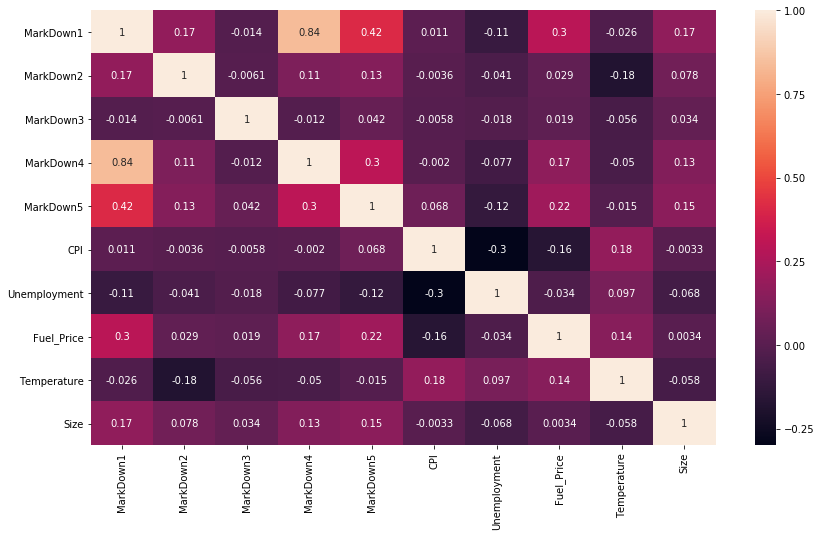

In [31]:
plt.figure(figsize=(14,8))
corr=num.corr()
sns.heatmap(corr,annot=True)
plt.show()

By Observing the heatmap it can be said that vaiables Markdown 1 and Markdown 4 are highly coorelated , so it needs to be removed coorelation and similarly Unemployment column seems useless.

In [0]:
num.drop(['Unemployment','CPI','MarkDown4'],axis=1,inplace=True)

In [0]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()


num[['MarkDown2','MarkDown3','MarkDown5', 'MarkDown1', 'Fuel_Price', 'Temperature','Size']] = minmax.fit_transform(num[['MarkDown2','MarkDown3','MarkDown5', 'MarkDown1', 'Fuel_Price', 'Temperature','Size']])


In [34]:
num.head()

,MarkDown1,MarkDown2,MarkDown3,MarkDown5,Fuel_Price,Temperature,Size
0,0.0,0.002536,0.000205,0.0,0.050100,0.434149,0.630267
1,0.0,0.002536,0.000205,0.0,0.038076,0.396967,0.630267
2,0.0,0.002536,0.000205,0.0,0.021042,0.410861,0.630267
3,0.0,0.002536,0.000205,0.0,0.044589,0.476419,0.630267
4,0.0,0.002536,0.000205,0.0,0.076653,0.475147,0.630267


In [0]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat['IsHoliday']=le.fit_transform(cat['IsHoliday'])
cat['Type']=le.fit_transform(cat['Type'])

In [36]:
cat.head()

,Store,Dept,IsHoliday,Type,year,month,day
0,1,1,0,0,2010,2,5
1,1,1,1,0,2010,2,12
2,1,1,0,0,2010,2,19
3,1,1,0,0,2010,2,26
4,1,1,0,0,2010,3,5


In [0]:
type_one_hot = pd.get_dummies(cat['Type'],prefix='Type')
isHoliday_one_hot = pd.get_dummies(cat['IsHoliday'],prefix='IsHoliday')


In [0]:
cat['year']=le.fit_transform(cat['year'])



In [39]:
cat.head()

,Store,Dept,IsHoliday,Type,year,month,day
0,1,1,0,0,0,2,5
1,1,1,1,0,0,2,12
2,1,1,0,0,0,2,19
3,1,1,0,0,0,2,26
4,1,1,0,0,0,3,5


In [0]:
cat.drop(['IsHoliday','Type'],axis=1,inplace=True)

In [0]:
cat=pd.concat([cat,type_one_hot,isHoliday_one_hot],axis=1)


In [42]:
cat.head()

,Store,Dept,year,month,day,Type_0,Type_1,Type_2,IsHoliday_0,IsHoliday_1
0,1,1,0,2,5,1,0,0,1,0
1,1,1,0,2,12,1,0,0,0,1
2,1,1,0,2,19,1,0,0,1,0
3,1,1,0,2,26,1,0,0,1,0
4,1,1,0,3,5,1,0,0,1,0


In [0]:
final_df=pd.concat([cat,num],axis=1)

In [44]:
final_df.head()

,Store,Dept,year,month,day,Type_0,Type_1,Type_2,IsHoliday_0,IsHoliday_1,MarkDown1,MarkDown2,MarkDown3,MarkDown5,Fuel_Price,Temperature,Size
0,1,1,0,2,5,1,0,0,1,0,0.0,0.002536,0.000205,0.0,0.050100,0.434149,0.630267
1,1,1,0,2,12,1,0,0,0,1,0.0,0.002536,0.000205,0.0,0.038076,0.396967,0.630267
2,1,1,0,2,19,1,0,0,1,0,0.0,0.002536,0.000205,0.0,0.021042,0.410861,0.630267
3,1,1,0,2,26,1,0,0,1,0,0.0,0.002536,0.000205,0.0,0.044589,0.476419,0.630267
4,1,1,0,3,5,1,0,0,1,0,0.0,0.002536,0.000205,0.0,0.076653,0.475147,0.630267


In [0]:
y=data['Weekly_Sales']

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_df,y,test_size=0.1)

In [47]:
X_train.head()

,Store,Dept,year,month,day,Type_0,Type_1,Type_2,IsHoliday_0,IsHoliday_1,MarkDown1,MarkDown2,MarkDown3,MarkDown5,Fuel_Price,Temperature,Size
186083,19,90,1,7,22,1,0,0,1,0,0.000000,0.002536,0.000205,0.000000,0.751503,0.796771,0.914461
237816,25,6,0,3,5,0,1,0,1,0,0.000000,0.002536,0.000205,0.000000,0.152806,0.308317,0.504647
195360,20,79,0,5,28,1,0,0,1,0,0.000000,0.002536,0.000205,0.000000,0.213928,0.714579,0.914045
33170,4,27,1,12,9,1,0,0,1,0,0.066079,0.002823,0.007159,0.124439,0.341182,0.329746,0.925525
393825,42,27,2,3,16,0,0,1,1,0,0.004946,0.002551,0.000222,0.020744,0.902305,0.627886,0.026063


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

lr=LinearRegression()
lr.fit(X_train,y_train)
print('R2 score',lr.score(X_test,y_test))




R2 score 0.08944816215506124


In [49]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100)
rfr.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [50]:
print('R2 by RFR',rfr.score(X_test,y_test))



R2 by RFR 0.9797887470269939


In [51]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
gbr.score(X_train,y_train)

0.73597813858433

In [52]:
print('R2 by GBR',gbr.score(X_test,y_test))


R2 by GBR 0.7470220418419593


In [53]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(X_train,y_train)
etr.score(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9999999995041149

In [54]:
print('R2 by ETR',etr.score(X_test,y_test))


R2 by ETR 0.9781663273612872


In [55]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
xgb.score(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:59:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.7358235149194419

In [56]:
print('R2 by XGB',xgb.score(X_test,y_test))


R2 by XGB 0.7469698100679298


**Dealing Test Values**

In [57]:
test.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64

In [0]:
Date=test['Date']


In [0]:
test['MarkDown1']=test['MarkDown1'].fillna(0)

test['MarkDown2']=test['MarkDown2'].fillna(0)
test['MarkDown3']=test['MarkDown3'].fillna(0)
test['MarkDown5']=test['MarkDown5'].fillna(0)


In [60]:
cols =  ['Date']

for col in cols:
    test[col] = pd.to_datetime(test[col])
    


test['year'] = test["Date"].dt.year
test['month'] =test["Date"].dt.month
test['day'] = test["Date"].dt.day
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,2012,11,2
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,2012,11,9
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,2012,11,16
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,2012,11,23
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,2012,11,30


In [0]:
type_one_hot_test = pd.get_dummies(test['Type'],prefix='Type')
isHoliday_one_hot_test = pd.get_dummies(test['IsHoliday'],prefix='IsHoliday')
test['year']=le.fit_transform(test['year'])

In [0]:
final_test=pd.concat([test,type_one_hot_test,isHoliday_one_hot_test],axis=1)

In [0]:
final_test.drop(['IsHoliday','Type','Date','CPI','Unemployment','MarkDown4'],axis=1,inplace=True)

In [0]:
final_test[['MarkDown2','MarkDown3','MarkDown5', 'MarkDown1', 'Fuel_Price', 'Temperature','Size']] = minmax.fit_transform(final_test[['MarkDown2','MarkDown3','MarkDown5', 'MarkDown1', 'Fuel_Price', 'Temperature','Size']])


In [65]:
final_test.head()

,Store,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown5,year,month,day,Type_A,Type_B,Type_C,IsHoliday_False,IsHoliday_True
0,1,1,0.630267,0.573142,0.410215,0.090103,0.072893,0.001537,0.003788,0,11,2,1,0,0,1,0
1,1,1,0.630267,0.627334,0.352753,0.134031,0.047907,0.001467,0.008215,0,11,9,1,0,0,1,0
2,1,1,0.630267,0.551172,0.303272,0.117752,0.004610,0.001891,0.008810,0,11,16,1,0,0,1,0
3,1,1,0.630267,0.581472,0.270551,0.034587,0.000561,0.501726,0.000633,0,11,23,1,0,0,0,1
4,1,1,0.630267,0.545862,0.267358,0.049464,0.000503,0.026844,0.009268,0,11,30,1,0,0,1,0


In [66]:
predictions=rfr.predict(final_test)
predictions

array([12258.0733, 12258.0733, 12258.0733, ...,  6272.6091,  6272.6091,
        6272.6091])

In [0]:
answer=pd.DataFrame()
answer['Id'] = final_test['Store'].astype(str) + '_' +  final_test['Dept'].astype(str) + '_' + Date.astype(str)
answer['Weekly_Sales']=predictions

In [68]:
answer.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,12258.0733
1,1_1_2012-11-09,12258.0733
2,1_1_2012-11-16,12258.0733
3,1_1_2012-11-23,73180.1136
4,1_1_2012-11-30,12258.0733


In [0]:
answer.to_csv('Salessubmit13.csv',index=False)